In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 99kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=d23e84044f53d61fe232fff76d48b92a16b2ec585ed4677832979c0db882f943
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

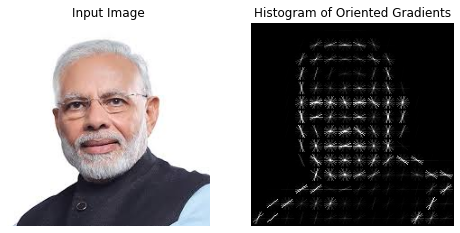

In [4]:
image=cv2.imread('nm.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)



fd,hog_image=hog(image, orientations=9, pixels_per_cell=(16,16),
                  cells_per_block=(1,1),visualize=True, multichannel=True)
#Plot Input and HOG Image
fig,(ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(8,4), sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')


# Rescaling Histogram for a better display
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,15))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [5]:
len(fd)

1764

In [6]:
image.shape

(225, 225, 3)

In [7]:
!pip install face_recognition
import face_recognition

Face Detection

In [8]:
import face_recognition


from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

Number of  face in input image: 2


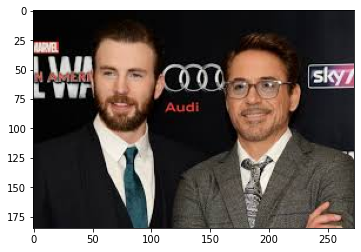

In [9]:
image=cv2.imread('chris.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Number of  face in input image:",number_of_faces)

A face is located at pixel location Top:49, Left:38,Bottom:101, Right:90
A face is located at pixel location Top:156, Left:46,Bottom:218, Right:108


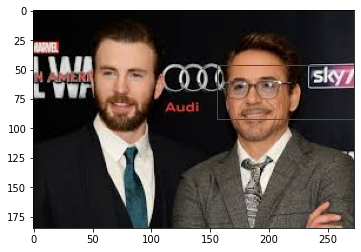

In [10]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    print('A face is located at pixel location Top:{}, Left:{},Bottom:{}, Right:{}'.format(x,y,w,h))
     # drawing a rectangle around the face
rect= Rectangle((x,y),width=x,height=y,fill=False,color="red")
ax.add_patch(rect)
     # show image
plt.show()

Face Recognition

In [11]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
%matplotlib inline

In [12]:
image=cv2.imread('nm.jpg')
nm= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  # Chris Evans
image=cv2.imread('c1.jpg')
chris= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
 # Robert
image=cv2.imread('r1.jpg')
robert= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [22]:
nm_encoding=face_recognition.face_encodings(nm)[0]
chris_encoding=face_recognition.face_encodings(chris)[0]
robert_encoding=face_recognition.face_encodings(robert)[0]
# Creating database
known_face_encodings=[
         nm_encoding,
         chris_encoding,
         robert_encoding            
]

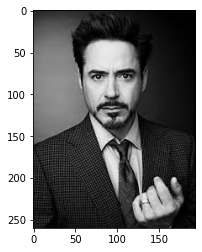

In [28]:
image=cv2.imread('r2.jpg')
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
# get face encoding for any person
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [29]:
from scipy.spatial import distance
#for looping over each person in the picture
for unknown_face_encoding in unknown_face_encodings:
# test if the unknown face matches any of the people we know
   results=[]
   for known_face_encoding in known_face_encodings: 
     d=distance.euclidean(known_face_encoding,unknown_face_encoding)
     results.append(d)
   threshold=0.6
   results=np.array(results) <=threshold
   name= "Unknown"
   if results[0]:
     name="nm"
   elif results[1]:
     name="Chris Evans"
   elif results[2]:
     name="Robert Downey Jr."

   print(f"Found {name} in the photo!")  


Found Robert Downey Jr. in the photo!


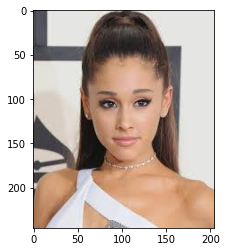

In [43]:
image=cv2.imread('a1.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

Facial Landmarks

In [44]:
face_landmarks_list=face_recognition.face_landmarks(image)

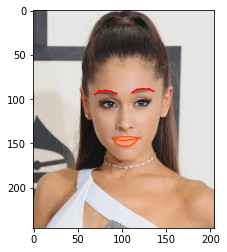

In [45]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax=plt.gca()

for face_landmarks in face_landmarks_list:
  left_eyebrow_pts=face_landmarks['left_eyebrow']
  pre_x,pre_y=left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l= mlines.Line2D([pre_x,x],[pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y

  right_eyebrow_pts=face_landmarks['right_eyebrow']
  pre_x,pre_y=right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l= mlines.Line2D([pre_x,x],[pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y=x,y
  p= Polygon(face_landmarks['top_lip'],facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  p= Polygon(face_landmarks['bottom_lip'],facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)

# to show final image
plt.show()

